In [1]:
import torch
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
# a cnn
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder

# Define the path to your image data directory
data_dir = './mihh-training-fruits'

# Define transformations (optional)
transform = T.Compose([
    T.Resize((100, 100)),  # Resize images to a consistent size
    T.ToTensor(),        # Convert images to PyTorch tensors
])

# Create an ImageFolder dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Create a DataLoader for batching
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


Feature batch shape: torch.Size([32, 3, 100, 100])
Labels batch shape: torch.Size([32])


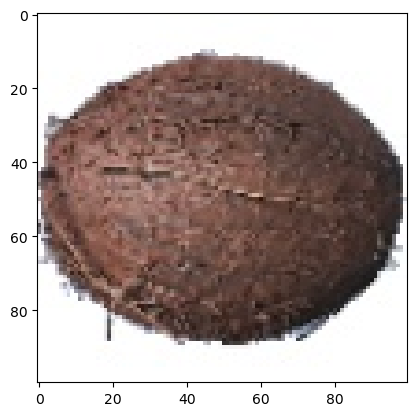

Label: 3


In [11]:
# Display image and label.
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].permute(1,2,0)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


In [13]:
#define the cnn and loss function and gradient descent
import torch.nn as nn
import torch.optim as optim
import torch

model=nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=10, kernel_size=10),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=10),
    nn.Flatten(),
   # nn.Linear(3*100*100*10//100, 1024),
     nn.Linear(810, 1024),
    nn.ReLU(),
    nn.Linear(1024, 6),
    nn.Softmax(dim=1)
)
loss_fn=nn.CrossEntropyLoss()
optimiser=optim.Adam(model.parameters(), lr=0.0001)
    

In [14]:
#define the training step
def train_model(model, optimiser, loss_fn, train_x, expected_y, epoch):
    #model.train()
    current_y=model(train_x)
    loss=loss_fn(current_y, expected_y)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

In [15]:
#actual trainnig
epochs=1000

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
model=model.to(device)

for epoch in range(epochs+1):
    data_iter=iter(dataloader)
    for batch, (train_features, train_labels) in enumerate(dataloader):
        train_model(model, optimiser, loss_fn, train_features.to(device), train_labels.to(device), epoch)  
    print(epoch, "epoch done")

0 epoch done
1 epoch done
2 epoch done
3 epoch done
4 epoch done
5 epoch done
6 epoch done
7 epoch done
8 epoch done
9 epoch done
10 epoch done
11 epoch done
12 epoch done
13 epoch done
14 epoch done
15 epoch done
16 epoch done
17 epoch done
18 epoch done
19 epoch done
20 epoch done
21 epoch done
22 epoch done
23 epoch done
24 epoch done
25 epoch done
26 epoch done
27 epoch done
28 epoch done
29 epoch done
30 epoch done
31 epoch done
32 epoch done
33 epoch done
34 epoch done
35 epoch done
36 epoch done
37 epoch done
38 epoch done
39 epoch done
40 epoch done
41 epoch done
42 epoch done
43 epoch done
44 epoch done
45 epoch done
46 epoch done
47 epoch done
48 epoch done
49 epoch done
50 epoch done
51 epoch done
52 epoch done
53 epoch done
54 epoch done
55 epoch done
56 epoch done
57 epoch done
58 epoch done
59 epoch done
60 epoch done
61 epoch done
62 epoch done
63 epoch done
64 epoch done
65 epoch done
66 epoch done
67 epoch done
68 epoch done
69 epoch done
70 epoch done
71 epoch done
72

tensor(5)
Label: 5


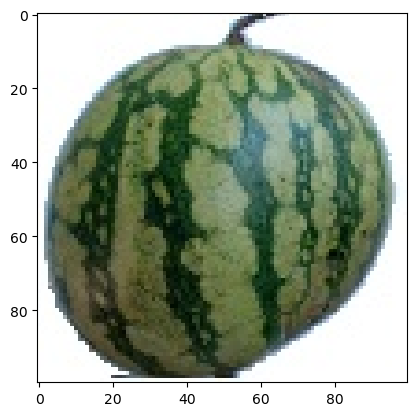

In [88]:
# manual testing 

# a cnn
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import torch

# Define the path to your image data directory
data_dir = './mihh-test-fruits'

# Define transformations (optional)
transform = T.Compose([
    T.Resize((100, 100)),  # Resize images to a consistent size
    T.ToTensor(),        # Convert images to PyTorch tensors
])

# Create an ImageFolder dataset
test_dataset = ImageFolder(root=data_dir, transform=transform)

# Create a DataLoader for batching
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Display image and label.
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(test_dataloader))


print(torch.argmax( (model.to( torch.device("cpu"))(train_features)[0])) )
#print(torch.argmax((model(train_features.to(device))[0])) )
print(f"Label: {train_labels[0]}")

img = train_features[0].permute(1,2,0)
plt.imshow(img, cmap="gray")
plt.show()


In [87]:
#actual testing
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import torch
from sklearn.metrics import accuracy_score
data_dir = './mihh-test-fruits'
transform = T.Compose([
    T.Resize((100, 100)),  # Resize images to a consistent size
    T.ToTensor(),        # Convert images to PyTorch tensors
])
test_dataset = ImageFolder(root=data_dir, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

count=0
succeses=0

def evaluate_iteration(train_features, expected_y):
    actual_y=model(train_features)
    actual_y= [torch.argmax(x) for x in actual_y]
    accuracy=accuracy_score(actual_y, expected_y)
    print(accuracy)
    return accuracy
print("hi")

accuracy=0
count=0
data_iter=iter(dataloader)
for batch, (train_features, train_labels) in enumerate(test_dataloader):
    accuracy+=evaluate_iteration(train_features, train_labels)
    count+=1
        
print(f"Accuracy = {accuracy/count}") 
        

hi
0.90625
1.0
0.9375
0.96875
1.0
0.96875
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.96875
1.0
0.96875
0.9375
1.0
0.96875
0.96875
1.0
0.96875
0.96875
0.9375
0.9375
0.9375
0.90625
1.0
0.96875
1.0
0.96875
1.0
0.9375
0.9375
0.96875
0.96875
0.96875
1.0
0.96875
0.90625
1.0
0.96875
0.96875
0.9375
0.96875
0.96875
0.96875
0.96875
0.84375
0.9411764705882353
Accuracy = 0.9682093425605536


In [30]:
#pickleing my model
import pickle


output = open('model.pkl', 'wb')

pickle.dump(model, output)

output.close()


In [23]:
#pickleing my model
import pickle


pk_file = open('model.pkl', 'rb')

model=pickle.load(pk_file)

output.close()
